In [49]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import imagesize

In [50]:
# %pip install imagesize

In [51]:
df = pd.read_csv('test.txt', header=None)

In [53]:
df.tail()

,0
8477,S24538 sub-S24538_ses-E50624_run-1_bp-chest_vp...
8478,S24539 sub-S24539_ses-E50625_run-1_bp-chest_vp...
8479,S24540 sub-S24540_ses-E50626_run-1_bp-chest_vp...
8480,S24540 sub-S24540_ses-E60362_run-1_bp-chest_vp...
8481,S24541 sub-S24541_ses-E50627_run-1_bp-chest_vp...


In [54]:
df = df[0].str.split(' ', expand=True)

In [55]:
df.rename(columns={0: "test_id", 1: 'filename', 2: 'test_result', 3: 'data_source'}, inplace=True)

In [8]:
df.head()

,test_id,filename,test_result,data_source
0,419639-003251,MIDRC-RICORD-1C-419639-003251-46647-0.png,positive,ricord
1,419639-001464,MIDRC-RICORD-1C-419639-001464-39871-0.png,positive,ricord
2,419639-000918,MIDRC-RICORD-1C-419639-000918-78965-0.png,positive,ricord
3,419639-003318,MIDRC-RICORD-1C-419639-003318-64285-0.png,positive,ricord
4,419639-001015,MIDRC-RICORD-1C-419639-001015-81591-0.png,positive,ricord


In [9]:
df.describe()

,test_id,filename,test_result,data_source
count,8482,8482,8482,8482
unique,4722,8482,2,3
top,S09382,MIDRC-RICORD-1C-419639-003251-46647-0.png,positive,bimcv
freq,38,1,4241,8082


In [11]:
df['full_filepath'] = df.apply(lambda row: os.path.join('test', row.filename), axis=1)

In [12]:
df.head()

,test_id,filename,test_result,data_source,full_filepath
0,419639-003251,MIDRC-RICORD-1C-419639-003251-46647-0.png,positive,ricord,test/MIDRC-RICORD-1C-419639-003251-46647-0.png
1,419639-001464,MIDRC-RICORD-1C-419639-001464-39871-0.png,positive,ricord,test/MIDRC-RICORD-1C-419639-001464-39871-0.png
2,419639-000918,MIDRC-RICORD-1C-419639-000918-78965-0.png,positive,ricord,test/MIDRC-RICORD-1C-419639-000918-78965-0.png
3,419639-003318,MIDRC-RICORD-1C-419639-003318-64285-0.png,positive,ricord,test/MIDRC-RICORD-1C-419639-003318-64285-0.png
4,419639-001015,MIDRC-RICORD-1C-419639-001015-81591-0.png,positive,ricord,test/MIDRC-RICORD-1C-419639-001015-81591-0.png


In [13]:
imagesize.get(df['full_filepath'][0])

(1024, 826)

In [14]:
# width, height = imagesize.get("test.png")

In [19]:
df['x_shape'] = df.apply(lambda row: imagesize.get(row.full_filepath)[0], axis=1)
df['y_shape'] = df.apply(lambda row: imagesize.get(row.full_filepath)[1], axis=1)

In [20]:
df.head()

,test_id,filename,test_result,data_source,full_filepath,x_shape,y_shape
0,419639-003251,MIDRC-RICORD-1C-419639-003251-46647-0.png,positive,ricord,test/MIDRC-RICORD-1C-419639-003251-46647-0.png,1024,826
1,419639-001464,MIDRC-RICORD-1C-419639-001464-39871-0.png,positive,ricord,test/MIDRC-RICORD-1C-419639-001464-39871-0.png,1024,790
2,419639-000918,MIDRC-RICORD-1C-419639-000918-78965-0.png,positive,ricord,test/MIDRC-RICORD-1C-419639-000918-78965-0.png,1024,851
3,419639-003318,MIDRC-RICORD-1C-419639-003318-64285-0.png,positive,ricord,test/MIDRC-RICORD-1C-419639-003318-64285-0.png,1024,851
4,419639-001015,MIDRC-RICORD-1C-419639-001015-81591-0.png,positive,ricord,test/MIDRC-RICORD-1C-419639-001015-81591-0.png,1024,791


In [22]:
df.describe()

,x_shape,y_shape
count,8482.000000,8482.000000
mean,1019.528649,894.531007
std,23.375884,82.648053
min,761.000000,553.000000
25%,1024.000000,839.000000
50%,1024.000000,843.000000
75%,1024.000000,1004.000000
max,1024.000000,1024.000000


(array([1.000e+00, 1.000e+00, 2.800e+01, 6.700e+01, 1.700e+01, 2.100e+01,
        3.900e+01, 6.600e+01, 7.300e+01, 8.169e+03]),
 array([ 761. ,  787.3,  813.6,  839.9,  866.2,  892.5,  918.8,  945.1,
         971.4,  997.7, 1024. ]),
 <BarContainer object of 10 artists>)

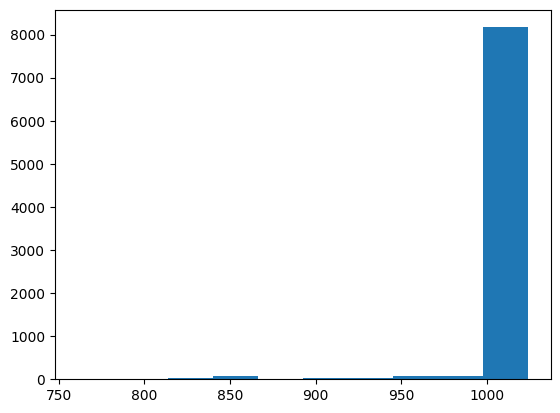

In [27]:
plt.hist(df['x_shape'])

(array([2.000e+00, 3.000e+00, 8.000e+00, 3.100e+01, 7.500e+01, 7.950e+02,
        4.596e+03, 3.580e+02, 2.820e+02, 2.332e+03]),
 array([ 553. ,  600.1,  647.2,  694.3,  741.4,  788.5,  835.6,  882.7,
         929.8,  976.9, 1024. ]),
 <BarContainer object of 10 artists>)

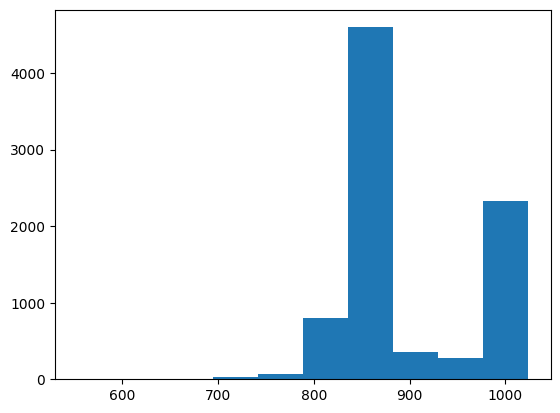

In [25]:
plt.hist(df['y_shape'])

In [30]:
nan_count = df.isna().sum()
print(nan_count)

test_id          0
filename         0
test_result      0
data_source      0
full_filepath    0
x_shape          0
y_shape          0
dtype: int64


### TorchXRayVision Testing

In [2]:
# !pip install torchxrayvision

In [57]:
import torchxrayvision as xrv
import skimage, torch, torchvision


In [58]:
import numpy as np
import skimage
import torch
import torchvision
import matplotlib.pyplot as plt
import torchxrayvision as xrv

In [59]:
model = xrv.baseline_models.chestx_det.PSPNet()


In [60]:
model

chestx-det-pspnet

In [61]:
# Read the image
img_path = "test/MIDRC-RICORD-1C-419639-003251-46647-0.png"  # change this to your image path
img = skimage.io.imread(img_path)

# Normalize the image
img = xrv.datasets.normalize(img, 255)

# Check if the image is already 2D (grayscale), then add a new axis
if img.ndim == 2:
    img = img[None, ...]  # Add a new axis to make it 3D
elif img.ndim == 3:
    # Convert RGB to grayscale if it's not already grayscale
    img = img.mean(2)[None, ...]  # Calculate the mean across the color channels

transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),xrv.datasets.XRayResizer(512)])

img = transform(img)
img = torch.from_numpy(img)

Setting XRayResizer engine to cv2 could increase performance.


In [62]:
with torch.no_grad():
    pred = model(img)

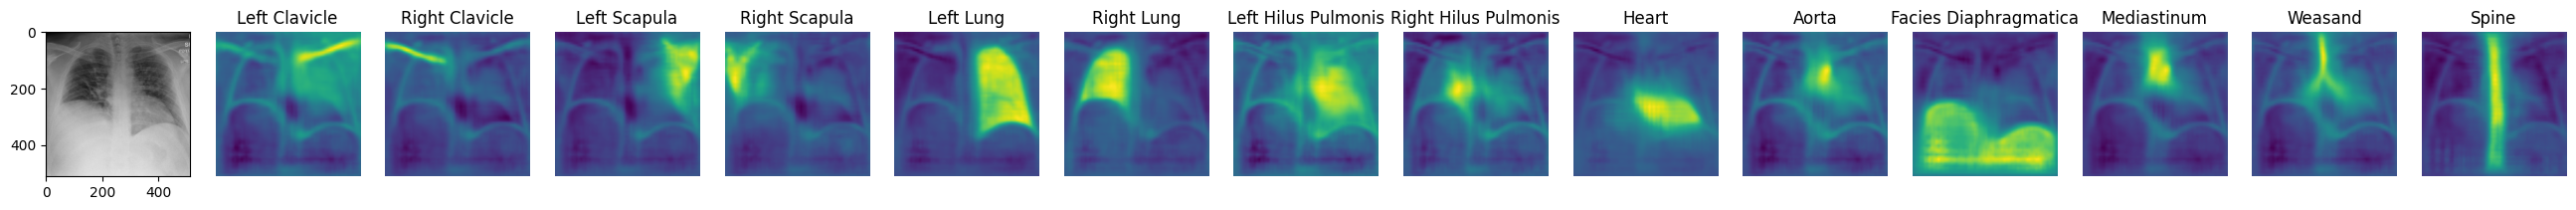

In [69]:
plt.figure(figsize = (26,5))
plt.subplot(1, len(model.targets) + 1, 1)
plt.imshow(img[0], cmap='gray')
for i in range(len(model.targets)):
    plt.subplot(1, len(model.targets) + 1, i+2)
    plt.imshow(pred[0, i])
    plt.title(model.targets[i])
    plt.axis('off')
plt.tight_layout()

In [71]:
pred = 1 / (1 + np.exp(-pred))  # sigmoid
pred[pred < 0.5] = 0
pred[pred > 0.5] = 1

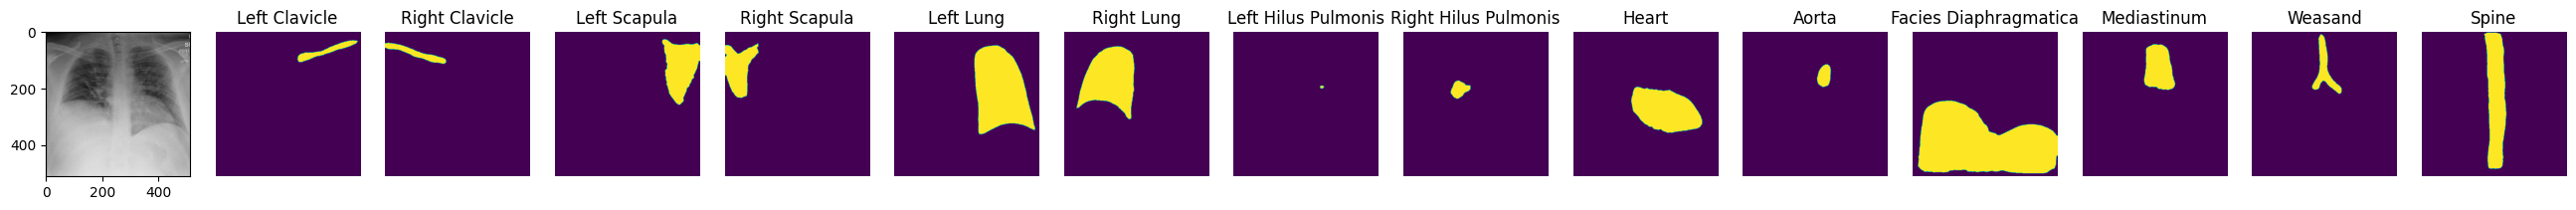

In [72]:
plt.figure(figsize = (26,5))
plt.subplot(1, len(model.targets) + 1, 1)
plt.imshow(img[0], cmap='gray')
for i in range(len(model.targets)):
    plt.subplot(1, len(model.targets) + 1, i+2)
    plt.imshow(pred[0, i])
    plt.title(model.targets[i])
    plt.axis('off')
plt.tight_layout()